In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Model Comparison

To compare our models, we plot each of their ROC curves on the same graph. To avoid clutter (and to ensure that we compare like with like) for the LDA and HDP models we only plot the curves for the topic model combined with the SVM classifier. For comparison of the different classifiers when used with these models, see the respective sections of the report.

Note that for each of the HDP curves, 10 different models were trained. The three different curves represent different methods of combining these models (taking only the best and discarding the others, having them vote on a classification, and taking the average score from each model).

In [59]:
non_topic_x, non_topic_y, _ = np.load('../data/roc_svm_tf.npy')
#lda_simple_x, lda_simple_y, _ = np.load('data/LDA_Model_Classifier_ROC.npy')
#lda_simple2_x, lda_simple2_y, _ = np.load('data/LDA_Custom_Classifier_ROC.npy')
lda_svm_x, lda_svm_y, _ = np.load('../data/LDA_SVM_ROC.npy')
hdp_best_x, hdp_best_y, _ = np.load('../data/HDP_SVM_Best.npy')
hdp_vote_x, hdp_vote_y, _ = np.load('../data/HDP_SVM_Vote.npy')
hdp_mean_x, hdp_mean_y, _ = np.load('../data/HDP_SVM_Mean.npy')

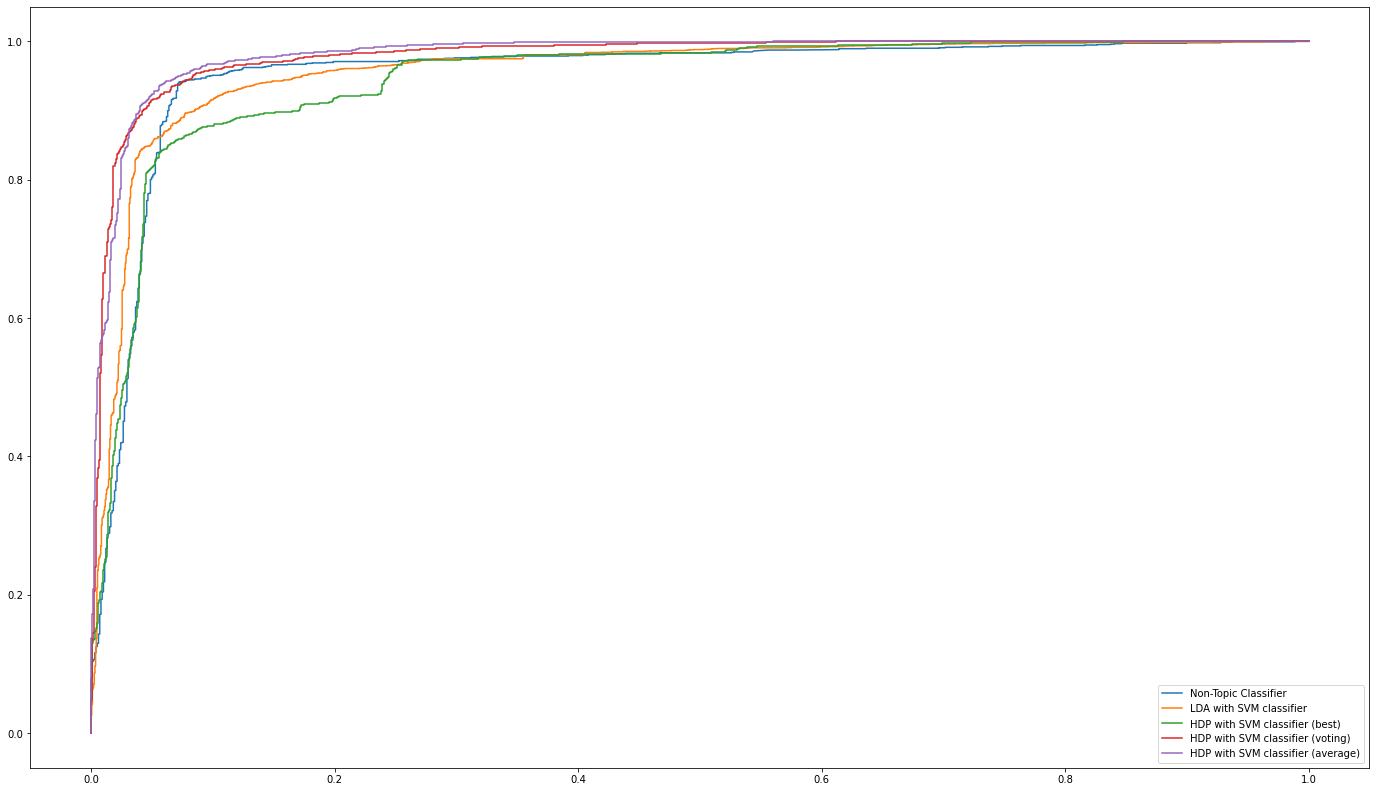

In [60]:
plt.subplots(figsize=(24,14))
plt.plot(non_topic_x, non_topic_y, label="Non-Topic Classifier")
#plt.plot(lda_simple_x, lda_simple_y, label="LDA with simple classifier")
#plt.plot(lda_simple2_x, lda_simple2_y, label="LDA with improved simple classifier")
plt.plot(lda_svm_x, lda_svm_y, label="LDA with SVM classifier")
plt.plot(hdp_best_x, hdp_best_y, label="HDP with SVM classifier (best)")
plt.plot(hdp_vote_x, hdp_vote_y, label="HDP with SVM classifier (voting)")
plt.plot(hdp_mean_x, hdp_mean_y, label="HDP with SVM classifier (average)")

plt.legend()
#plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")

The AUC scores in each case are (sourced from the individual sections):
* 0.9536 for the Non-Topic Classifier
* 0.9575 for the LDA model with an SVM classifier
* 0.9451 for the HDP model with an SVM classifier (when we use only the best model trained and discard the rest)
* 0.9784 for the HDP model with an SVM classifier (when the 10 models vote on a classification)
* 0.9810 for the HDP model with an SVM classifier (when we take the average of the scores given by the 10 models)

By this metric, we see that the HDP model surprisingly performs the worst, at least when we use only one of the models (my hypothesis is that this may be due to the curse of dimensionality - the HDP model infers many more topics than the LDA model was fitted with, so the feature vectors fed to the SVM classifier are much higher-dimensional). The LDA model performs the best, but not that much better than the non-topic classifier baseline.

However, this is not the whole story - by looking more closely at their respective ROC curves, we can see that the LDA model performs significantly better than the non-topic classifier when we require that the false positive rate is very low. For the application of spam filtration, this is quite desirable! After all, the cost of having a single spam email slip through the filter is likely to be significantly less than the cost of having a single legitimate email erroneously blocked. So though the LDA model's performance is only slightly better than the non-topic model's by our metric, it is likely to be significantly better in practice. Also, both the LDA and HDP models are much easier to compute with than the term frequency-based classifier (due to the huge number of features produced) - so the topic models should be much more viable with even larger datasets than this one.

We can also clearly see that the HDP models using either form of model combination totally outclass all the other models considered. However, this is only loosely related to the actual model used - the fact that the optimal number of topics didn't need to be determined with HDP was what gave us the time to train the extra models, but with more computation time it would be totally viable to do the same thing with LDA (likely with similar results). 

The classifiers combined with the topic models are discussed in more detail in the respective sections of the report, but in general we found that the more basic non-model classifier performed quite poorly, but that the improved version performed only slightly worse than an SVM (and was much less computationally intensive). Unsurprisingly, a Random Forest performed significantly better than either (though this was only tested with HDP, and not LDA).

# Conclusion

In conclusion, we found that the LDA topic model only performed slightly better than the term frequency SVM classifier with our chosen AUC metric. However, the fact that it was less computationally intensive and that it performs better when the threshold is adjusted for a very low false positive rate should make it in practice significantly superior. Conversely, the HDP while on paper sounding better than LDA turned out to be poorly-suited for this application due to it producing a much higher-dimensional feature space and there 